In [1]:
import timeit
notebook_start_time = timeit.default_timer()
import os
import random
import sys 
print ("cwd:", os.getcwd()) 
print (sys.version_info)

import numpy as np
import matplotlib.pyplot as plt
import imageio

cwd: /home/ec2-user/kaggle/PlantSeedlings
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import torch, cv2

In [4]:
# This file contains all the main external libs we'll use
os.chdir("/home/ec2-user/fastai")
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
#added by AspiringGuru. 
import urllib.request 
import shutil 
import os.path
from sklearn.metrics import accuracy_score

In [7]:
PATH = "/home/ec2-user/kaggleData/seedlings/"
#NB: this dir has had data configured to dir structure expected by fast.ai packages
sz=224  #resize images to this size


In [8]:
DATADIR = "/home/ec2-user/kaggleData/seedlings/"
TESTDIR = DATADIR + "test/"
TRAINDIR = DATADIR + "train/"
VALIDDIR = DATADIR + "valid/"
train_fraction = 0.2  #train_fraction = train/(train+test)

In [9]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name="test")
print (type(data))

<class 'fastai.dataset.ImageClassifierData'>


In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
print (type(learn))

<class 'fastai.conv_learner.ConvLearner'>


In [11]:
start_time = timeit.default_timer()
learn.fit(0.01, 2)
print ("elapsed time :", timeit.default_timer() - start_time)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.573078   0.959999   0.683292  
    1      1.082      0.74131    0.752553                 

elapsed time : 2.518248351000011


In [12]:
#learn.save('first_model_')

In [13]:
#learn.load('first_model_')

In [14]:
type(data.trn_ds.y), data.trn_ds.y.shape, data.trn_ds.y[0:5], np.unique(data.trn_ds.y)

(numpy.ndarray,
 (3803,),
 array([0, 0, 0, 0, 0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [15]:
type(data.val_ds.y), data.val_ds.y.shape, data.val_ds.y[0:5], np.unique(data.val_ds.y)

(numpy.ndarray,
 (947,),
 array([0, 0, 0, 0, 0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [16]:
print (type(data.test_ds))
print (data.test_ds.y.shape)
print (dir(data.test_ds))
print (np.unique(data.test_ds.y))
print (type(data.test_ds.fnames), data.test_ds.fnames[0:5])

<class 'fastai.dataset.FilesIndexArrayDataset'>
(794, 1)
['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'c', 'denorm', 'fnames', 'get', 'get_c', 'get_n', 'get_sz', 'get_x', 'get_y', 'is_multi', 'is_reg', 'n', 'path', 'resize_imgs', 'sz', 'transform', 'y']
[0.]
<class 'list'> ['test/7f46a71db.png', 'test/f4ad9d950.png', 'test/e901b0f28.png', 'test/c6b76307d.png', 'test/148bbda66.png']


In [17]:
classes = data.classes
print (classes)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [18]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
print ("log_preds.shape:", log_preds.shape)

log_preds.shape: (947, 12)


In [19]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
#find category by col number of maximum probability.

probs = np.exp(log_preds[:,1])        # pr(dog)
print ("log_preds.shape:", log_preds.shape)
print ("preds:", type(preds), preds.shape, preds[0:5], np.unique(preds))
print ("probs:", type(probs), probs.shape, probs[0:5], "max:", probs.max(), ", min:", probs.min())

log_preds.shape: (947, 12)
preds: <class 'numpy.ndarray'> (947,) [0 0 6 3 6] [ 0  1  2  3  4  5  6  7  8  9 10 11]
probs: <class 'numpy.ndarray'> (947,) [0.01819 0.00005 0.00264 0.01902 0.00005] max: 0.9994823 , min: 6.878065e-07


In [20]:
acc = accuracy_score(data.val_ds.y, preds)
print ("accuracy for simplest model on validation dataset : ", acc)

accuracy for simplest model on validation dataset :  0.7518479408658922


In [21]:
test_log_preds = learn.predict(is_test=True)
test_preds = np.argmax(test_log_preds, axis=1)  # from log probabilities to 0 or 1
print ("test_log_preds:", type(test_log_preds), test_log_preds.shape)
print ("test_preds:", type(test_preds), test_preds.shape)

test_log_preds: <class 'numpy.ndarray'> (794, 12)
test_preds: <class 'numpy.ndarray'> (794,)


In [22]:
def rand_by_mask(mask, num_selected=4): 
    return np.random.choice(np.where(mask)[0], num_selected, replace=False)
def rand_by_correct(is_correct, num_selected=4): 
    return rand_by_mask((preds == data.val_y)==is_correct, num_selected)

In [23]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [24]:
def load_img_id(ds, idx): 
    return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [25]:
def most_by_mask(mask, mult, num_selected=4):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:num_selected]]

def most_by_correct(y, is_correct, num_selected=4): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult, num_selected)

In [26]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [27]:
start_time = timeit.default_timer()
lrf=learn.lr_find()
print ("elapsed time :", timeit.default_timer() - start_time)


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 85%|████████▌ | 51/60 [00:00<00:00, 52.50it/s, loss=17.6]
elapsed time : 1.0046054970000569                         


In [28]:
#show the accuracy and confusion matrix
validate_log_preds = learn.predict(is_test=False)
print ("validate_log_preds:", type(validate_log_preds), validate_log_preds.shape)
validate_preds = np.argmax(validate_log_preds, axis=1)  # from log probabilities to 0 or 1
print ("validate_preds:", type(validate_preds), validate_preds.shape, np.unique(validate_preds))

validate_log_preds: <class 'numpy.ndarray'> (947, 12)
validate_preds: <class 'numpy.ndarray'> (947,) [ 0  1  2  3  4  5  6  7  8 11]


In [29]:
acc = accuracy_score(data.val_ds.y, validate_preds)
print ("accuracy for simplest model on validation dataset : ", acc)
#acc is very low. prob wrong because just calc'd lr_find

accuracy for simplest model on validation dataset :  0.0781414994720169


In [30]:
confusion_matrix(data.val_ds.y, validate_preds)

array([[ 2,  8,  2,  0, 18,  0, 18,  0,  0,  0,  0,  4],
       [11,  4,  2,  0, 43,  0, 17,  1,  0,  0,  0,  0],
       [ 6,  2,  0,  0, 43,  0,  2,  0,  2,  0,  0,  2],
       [ 9, 11,  0,  0, 93,  0,  7,  0,  2,  0,  0,  0],
       [ 1,  8,  1,  0, 20,  0,  9,  0,  1,  0,  0,  4],
       [ 9,  3,  2,  0, 65,  0,  8,  3,  0,  0,  0,  5],
       [ 6,  4,  2,  1, 74,  2, 36,  0,  2,  0,  0,  3],
       [ 4,  8,  6,  0,  7,  0,  5,  2,  2,  0,  0, 10],
       [ 9,  5,  1,  0, 78,  0,  7,  1,  2,  0,  0,  0],
       [ 8,  3,  0,  0, 32,  0,  2,  0,  1,  0,  0,  0],
       [16,  0,  0,  0, 54,  5, 19,  1,  3,  0,  0,  1],
       [ 3, 20,  1,  0, 31,  0, 13,  1,  0,  0,  0,  8]])

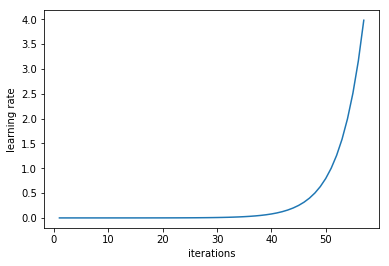

In [31]:
learn.sched.plot_lr()

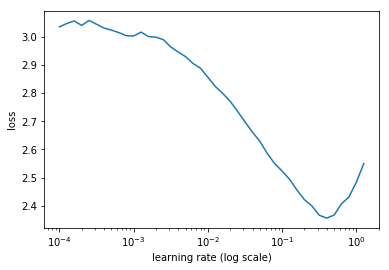

In [32]:
learn.sched.plot()

In [33]:
#tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
tfms=tfms_from_model(resnet34, sz)

In [34]:
print ("train data------------------------------------------------------------")
print (type(data.trn_ds.y), data.trn_ds.y.shape, data.trn_ds.y[0:5], np.unique(data.trn_ds.y))
print ("validation data-------------------------------------------------------")
print (type(data.val_ds.y), data.val_ds.y.shape, data.val_ds.y[0:5], np.unique(data.val_ds.y))
print ("test data-------------------------------------------------------")
print (type(data.test_ds))
print (data.test_ds.y.shape)
print (np.unique(data.test_ds.y))
print (type(data.test_ds.fnames), data.test_ds.fnames[0:5])

train data------------------------------------------------------------
<class 'numpy.ndarray'> (3803,) [0 0 0 0 0] [ 0  1  2  3  4  5  6  7  8  9 10 11]
validation data-------------------------------------------------------
<class 'numpy.ndarray'> (947,) [0 0 0 0 0] [ 0  1  2  3  4  5  6  7  8  9 10 11]
test data-------------------------------------------------------
<class 'fastai.dataset.FilesIndexArrayDataset'>
(794, 1)
[0.]
<class 'list'> ['test/7f46a71db.png', 'test/f4ad9d950.png', 'test/e901b0f28.png', 'test/c6b76307d.png', 'test/148bbda66.png']


In [35]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [36]:
print ("train data------------------------------------------------------------")
print (type(data.trn_ds.y), data.trn_ds.y.shape, data.trn_ds.y[0:5], np.unique(data.trn_ds.y))
print ("validation data-------------------------------------------------------")
print (type(data.val_ds.y), data.val_ds.y.shape, data.val_ds.y[0:5], np.unique(data.val_ds.y))
print ("test data-------------------------------------------------------")
print (type(data.test_ds))
print (data.test_ds.y.shape)
print (np.unique(data.test_ds.y))
print (type(data.test_ds.fnames), data.test_ds.fnames[0:5])

train data------------------------------------------------------------
<class 'numpy.ndarray'> (3803,) [0 0 0 0 0] [ 0  1  2  3  4  5  6  7  8  9 10 11]
validation data-------------------------------------------------------
<class 'numpy.ndarray'> (947,) [0 0 0 0 0] [ 0  1  2  3  4  5  6  7  8  9 10 11]
test data-------------------------------------------------------


AttributeError: 'NoneType' object has no attribute 'dataset'

In [ ]:
start_time = timeit.default_timer()
print (learn.fit(1e-2, 1))
print ("elapsed time :", timeit.default_timer() - start_time)

In [ ]:
learn.precompute=False

In [37]:
start_time = timeit.default_timer()
learn.fit(1e-2, 3, cycle_len=1)
print ("elapsed time :", timeit.default_timer() - start_time)
#nb: looks like could run more epochs to get better result.

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.694133   1.168119   0.632761  
    1      1.248337   0.896063   0.708558                 
    2      1.026012   0.791487   0.743444                 

elapsed time : 3.538917665000099


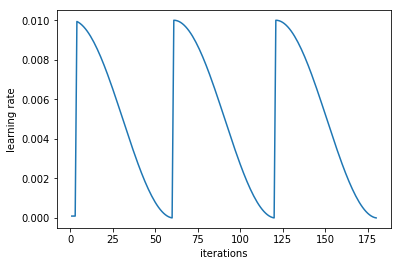

In [38]:
learn.sched.plot_lr()

In [39]:
#lets look at accuracy and confusion matrix now.
start_time = timeit.default_timer()
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
print ("elapsed time :", timeit.default_timer() - start_time)
print ("type(probs):", type(probs), probs.shape)

elapsed time : 0.9306060700000671            
type(probs): <class 'numpy.ndarray'> (947, 12)


In [40]:
#nb :type(learn)) #https://github.com/aspiringguru/fastai/blob/master/fastai/conv_learner.py
probs.shape, probs[:, 0:2]

((947, 12), array([[0.61039, 0.00181],
        [0.68138, 0.00144],
        [0.44938, 0.00082],
        ...,
        [0.0823 , 0.00226],
        [0.0003 , 0.00018],
        [0.0001 , 0.00001]], dtype=float32))

In [41]:
preds = np.argmax(probs, axis=1)
preds.shape, np.unique(preds)

((947,), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [42]:
acc = accuracy_score(data.val_ds.y, preds)
print ("accuracy for simplest model on validation dataset : ", acc)
#this = 0.778, previous 0.758

accuracy for simplest model on validation dataset :  0.7423442449841605


[[ 12   0   0   1   3   0  34   0   2   0   0   0]
 [  0  68   2   0   1   3   0   0   0   0   4   0]
 [  0   4  40   1   1   2   1   0   2   3   2   1]
 [  0   0   1  99   0   3   4   0   5   2   6   2]
 [  5   0   0   0  26   3   7   0   3   0   0   0]
 [  1   2   2  11   1  70   2   0   2   2   0   2]
 [  5   0   0   1   2   0 117   0   5   0   0   0]
 [  0   1   0   0   0   1   0  38   1   0   0   3]
 [  0   1   1  19   0   2  10   0  69   0   0   1]
 [  0   0   0  13   0   1   1   0   8  12  11   0]
 [  0   1   3   2   0   1   1   0   0   1  90   0]
 [  0   2   0   6   0   4   1   0   2   0   0  62]]


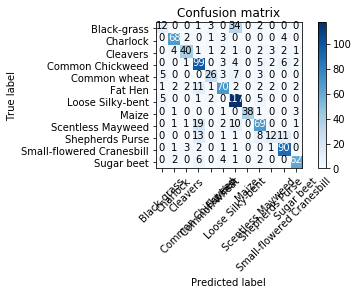

In [43]:
cm = confusion_matrix(data.val_ds.y, preds)
plot_confusion_matrix(cm, data.classes)

In [44]:
learn.unfreeze()

In [45]:
diff_learning_rates = [1e-4,1e-3,1e-2]
lr=np.array(diff_learning_rates)

In [46]:
#this cell takes a loong time. skip and load model from previous training.
start_time = timeit.default_timer()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
print ("elapsed time :", timeit.default_timer() - start_time)


HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.864531   0.741805   0.7596    
    1      0.788112   0.667508   0.780699                  
    2      0.726483   0.655481   0.787725                  
    3      0.69441    0.609033   0.793709                  
    4      0.636536   0.573884   0.81299                   
    5      0.592814   0.559053   0.81585                   
    6      0.574011   0.56338    0.808558                  

elapsed time : 262.0006253020001


In [ ]:
learn.sched.plot_lr()

In [ ]:
start_time = timeit.default_timer()
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
print ("elapsed time :", timeit.default_timer() - start_time)


In [ ]:
#nb :type(learn)) #https://github.com/aspiringguru/fastai/blob/master/fastai/conv_learner.py
probs.shape, probs[:, 0:2]
preds = np.argmax(probs, axis=1)
print ("preds:", preds.shape, np.unique(preds))
acc = accuracy_score(data.val_ds.y, preds)
print ("accuracy on validation dataset after unfreeze + : ", acc)
cm = confusion_matrix(data.val_ds.y, preds)
plot_confusion_matrix(cm, data.classes)

In [ ]:
type(learn)

In [ ]:
learn.sched.plot_lr()

In [ ]:
dir(data)

In [ ]:
type(data.trn_dl)

In [ ]:
test_log_preds = learn.predict(is_test=True)
test_preds = np.argmax(test_log_preds, axis=1)  # from log probabilities to 0 or 1

In [ ]:
results = pd.DataFrame({"file": [i.split("/")[1] for i in data.test_ds.fnames], 
                        "species":[classes[i] for i in test_preds]})
print (type(results), results.shape)

In [ ]:
results.to_csv('seedlings_bmt_reworked.csv', index=False)bb

In [ ]:
!kaggle competitions submit -c plant-seedlings-classification -f /home/ec2-user/kaggleData/seedlings/seedlings_bmt_reworked.csv -m "reworked"